BLE生データからセル（ビーコンボロノイ）ごとにエネルギー状態を求める

In [1]:
import pandas as pd 
import numpy as np 
import os 

In [2]:
basepath = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup' #/20230130_08' # /20230130_0845.csv'
day_stamp = '20230130'
time_stamp = '08'
date_stamp = f'{day_stamp}_{time_stamp}'
df = pd.read_csv(os.path.join(basepath, date_stamp, f'{date_stamp}45.csv'))
df_ble = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_nw_detail/ble_nw.csv')

In [16]:
df_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/micro_node_post.csv')
df_link = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/micro_link_post.csv')

In [15]:
print(df_ble)

    ID          x          y  floor
0    1 -11899.126 -37977.429   20.5
1    2 -11921.452 -37929.268   20.5
2    3 -11926.545 -37917.980   20.5
3    4 -11937.249 -37889.446   20.5
4    5 -11944.530 -37875.846   20.5
5    6 -11948.260 -37858.242   20.5
6    7 -11954.467 -37807.479   14.8
7    8 -11910.889 -37984.180   20.5
8    9 -11936.732 -37940.282   20.5
9   10 -11956.289 -37881.094   20.5
10  11 -11973.938 -37816.630   20.5
11  12 -11944.104 -37908.067   28.5
12  13 -11951.725 -37890.945   28.5
13  14 -11932.074 -37903.900   28.5
14  15 -11915.806 -37890.010   28.5
15  16 -11922.159 -37871.700   28.5
16  17 -11954.229 -37914.417   14.8
17  18 -11913.794 -37881.741   14.8
18  19 -11937.268 -37839.971   14.8
19  20 -11966.577 -37831.814   14.8
20  21 -11968.183 -37795.978   14.8
21  22 -11904.653 -37919.897   20.5
22  23 -11923.507 -37880.501   20.5


In [3]:
bleid_list = sorted(df['ID'].unique())

10秒単位での検出macアドレス数→密度計算をプロット

In [4]:
grouped = df.groupby('ID')
df_list = [group.reset_index(drop = True) for name, group in grouped]
filtered_df_list = []
mean_rssi_dict = {}
for j in range(len(df_list)):
    dfj = df_list[j]
    j_id = dfj.loc[0, 'ID']
    rssi_mean = dfj['RSSI'].mean()
    mean_rssi_dict[j_id] = rssi_mean

    filtered_dfj = dfj[dfj['RSSI'] >= rssi_mean]
    filtered_df_list.append(filtered_dfj)

print(mean_rssi_dict)

{1: -70.38608808360111, 2: -71.5396603973255, 3: -69.02775491003176, 4: -71.66883903042168, 5: -73.15427927927928, 6: -68.78739681900544, 7: -81.62706279190452, 15: -68.62808830073325, 16: -71.45025643779705, 17: -80.54346019247593, 18: -77.64990302494131, 19: -81.50684708625973, 20: -76.59212061383829, 21: -82.29228189381071, 22: -70.96004791431793, 23: -69.88143687707641}


In [5]:
resampled_df_list = []
for dfj in filtered_df_list:
    dfj_copy = dfj.copy()
   # print(dfj_copy)
    #dfj = filtered_df_list[j]
    dfj_copy['time'] = pd.to_datetime(dfj_copy['time'])
    dfj_copy.set_index('time', inplace=True)
    resampled_dfj = dfj_copy.groupby('ID').resample('10S')['MAC'].nunique().reset_index() # resample('10S')のところで10秒間隔でデータを再取得している！！
    resampled_df_list.append(resampled_dfj)
    print(resampled_dfj) # resampleは10秒間のデータをまとめて（＝平均RSSIや検出MAC合計数など）10秒ごとに1行にしている

    ID                      time  MAC
0    1 2023-01-30 08:30:00+09:00  117
1    1 2023-01-30 08:30:10+09:00  123
2    1 2023-01-30 08:30:20+09:00  161
3    1 2023-01-30 08:30:30+09:00  102
4    1 2023-01-30 08:30:40+09:00   91
..  ..                       ...  ...
85   1 2023-01-30 08:44:10+09:00   75
86   1 2023-01-30 08:44:20+09:00   91
87   1 2023-01-30 08:44:30+09:00  140
88   1 2023-01-30 08:44:40+09:00  203
89   1 2023-01-30 08:44:50+09:00  224

[90 rows x 3 columns]
    ID                      time  MAC
0    2 2023-01-30 08:30:00+09:00  145
1    2 2023-01-30 08:30:10+09:00  147
2    2 2023-01-30 08:30:20+09:00  156
3    2 2023-01-30 08:30:30+09:00  131
4    2 2023-01-30 08:30:40+09:00  112
..  ..                       ...  ...
85   2 2023-01-30 08:44:10+09:00   97
86   2 2023-01-30 08:44:20+09:00  100
87   2 2023-01-30 08:44:30+09:00  145
88   2 2023-01-30 08:44:40+09:00  134
89   2 2023-01-30 08:44:50+09:00  155

[90 rows x 3 columns]
    ID                      time  MAC
0   

beaconid=20, beacon_ix = 12
beaconid=21, beacon_ix = 13
beaconid=7, beacon_ix = 6


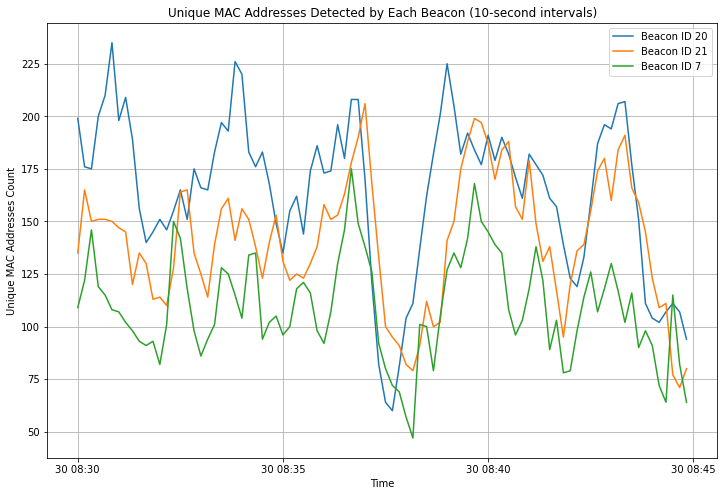

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 8))
for beacon_id in [20, 21, 7]:
    beacon_ix = bleid_list.index(beacon_id)
    print(f'beaconid={beacon_id}, beacon_ix = {beacon_ix}')
    # beacon_data = resampled_df[resampled_df['ID'] == beacon_id]
    # print(beacon_data)
    # mean_rssi = mean_rssi_dict[beacon_id]
    # filterd_beacon_data = beacon_data[beacon_data['RSSI'] >= mean_rssi]
    dfjb = resampled_df_list[beacon_ix]
    plt.plot(dfjb['time'], dfjb['MAC'], label=f'Beacon ID {beacon_id}')

plt.xlabel('Time')
plt.ylabel('Unique MAC Addresses Count')
plt.title('Unique MAC Addresses Detected by Each Beacon (10-second intervals)')
plt.legend()
plt.grid(True)
plt.show()

各セルにおける主流の方向を判別する

In [7]:
# 階段ではなくとりあえず平面部分の卓越方向を見る
# 

In [8]:
# 個人ごとに分割
grouped2 = df.groupby('MAC')
df_list2 = [group.reset_index(drop = True) for name, group in grouped2]

print(len(df_list2))

52199


In [9]:
# 検出ビーコン数が2以下の場合消去
filtered_df_list2 = []
for u in range(len(df_list2)):
    dfu = df_list2[u]
    if dfu['ID'].nunique() <= 2:
        continue
    dfu_copy = dfu.copy()
    filtered_df_list2.append(dfu_copy)

print(len(filtered_df_list2)) # 23070くらい（半減した）

23070


10秒間隔でtimestep与えて絞り込む

In [10]:
# 10秒ごとにサンプリング
# 検出時間が30秒以下のものは削除
import datetime 
import pytz
initial_time = pd.Timestamp('2023-01-30 08:30:00')
initial_time = initial_time.tz_localize('Asia/Tokyo')  # JSTとしてローカライズ

# timezone = pytz.timezone('Asia/Tokyo')  # JSTはUTC+9
# initial_time = initial_time.tz_localize(pytz.utc).tz_convert(timezone)
print(initial_time)
filtered_df_list3 = []
for dfu in filtered_df_list2:
    dfu_copy = dfu.copy()
    # print(dfj_copy)
    # dfj = filtered_df_list[j]
    dfu_copy['time'] = pd.to_datetime(dfu_copy['time']).dt.tz_convert('Asia/Tokyo') 
    # すでに形上では+9:00がついているものの，df.tz_convert以降をつけないと正式には認識されない！！
    # dfu_copy.set_index('time', inplace=True) 
    # print(dfu_copy.loc[0, 'time'] - initial_time) 

    dfu_copy['time_diff'] = (dfu_copy['time'] - initial_time).dt.total_seconds()
    dfu_copy['timestep'] = (dfu_copy['time_diff'] // 10).astype(int) # dt.tz_localize('Asia/Tokyo') 

    if dfu_copy['timestep'].nunique() <= 3:
        continue
    filtered_df_list3.append(dfu_copy)

print(len(filtered_df_list3))

2023-01-30 08:30:00+09:00
20657


各個人について10秒ごとにBLEビーコンNW上での観測重みグラフを作成
その差分から移動ベクトルを抽出したいが．．

In [11]:
res_dict = {} # 個人ごとに各timestepでBLEスコアを入れるT*Bのグラフ（行列）を格納
B = len(bleid_list) # Bはビーコン数
TT = 90 # 全部のtimestep数
for dfi in filtered_df_list3: # 個人ごと
    res_mat = np.zeros((TT, B)) # 各timestepでの各ビーコンのスコア
    # 時間ごとに分けて集計
    grouped3 = dfi.groupby('timestep')
    mac = dfi.loc[0, 'MAC']
    # res_dict[mac] = 0
    dfi_t_list = [group.reset_index(drop = True) for name, group in grouped3]
    for dfit in dfi_t_list: # 各timestep内で
        ts = dfit.loc[0, 'timestep']
        it_dict = {} # 各ビーコンの累積スコアを記録する辞書
        for i in range(len(dfit)):
            beacon_id = dfit.loc[i, 'ID']
            beacon_ix = bleid_list.index(beacon_id)
            rssi = dfit.loc[i, 'RSSI']
            res_mat[ts-1, beacon_ix] += (100+rssi)/10
            # if beacon_id not in it_dict.items():
            #     it_dict[beacon_id] = (100+rssi)/10
            # else:
            #     it_dict[beacon_id] = (100+rssi)/10
            #it
        # print(it_dict)
    res_dict[mac] = res_mat

items1 = list(res_dict.items())
# values = list(res_dict.values())
print(items1[0])

(' 00038a9bc1e248de3b9713d6967742fb8f85b24b7e7b4108bbacdc7a41366921', array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


In [12]:
# print(items1[0][1])
#np.set_printoptions(threshold=np.inf)
print(items1[0][0])
indices = np.nonzero(items1[0][1])
values = items1[0][1][indices]
for index, value in zip(zip(*indices), values):
    #print(index)
    time_beacon = (index[0], bleid_list[index[1]])
    print(f": time_beacon{time_beacon}, Value: {value}")


 00038a9bc1e248de3b9713d6967742fb8f85b24b7e7b4108bbacdc7a41366921
: time_beacon(40, 3), Value: 1.8
: time_beacon(40, 22), Value: 2.4
: time_beacon(42, 15), Value: 1.9
: time_beacon(42, 22), Value: 6.5
: time_beacon(43, 2), Value: 2.1
: time_beacon(43, 22), Value: 12.0
: time_beacon(44, 15), Value: 5.4
: time_beacon(45, 15), Value: 6.2
: time_beacon(45, 16), Value: 8.0
: time_beacon(46, 15), Value: 7.1000000000000005
: time_beacon(46, 16), Value: 4.4
: time_beacon(47, 16), Value: 2.5


res_dictに入っている各mac address毎に時間TTと検出ビーコンBでのスコア行列がある．個人内で行列の上下の差分をとって変位行列を作成する


In [13]:
# delta_res_dict = {}
# for mac, res_mat in list(res_dict.items()):
#     # 各個人毎に
#     # print(len(list(res_dict.items())))
#     delta_mat = np.zeros((TT-1, B))
#     for t in range(TT-1):
#         delta_mat[t, :] = res_mat[t+1, :] - res_mat[t, :]
#     delta_res_dict[mac] = delta_mat

# items2 = list(delta_res_dict.items())
# print(items2[0][0])
# indices2 = np.nonzero(items2[0][1])
# values2 = items2[0][1][indices2]
# for index, value in zip(zip(*indices2), values2):
#     #print(index)
#     time_beacon = (index[0], bleid_list[index[1]])
#     print(f": time_beacon{time_beacon}, Value: {value}")


KeyboardInterrupt: 

ベクトル演算早すぎ＝＝＝＝＝

In [14]:
delta_res_dict = {}
# 差分行列を計算する関数
def compute_delta_matrix(res_mat):
    return res_mat[1:, :] - res_mat[:-1, :] # この書き方つよい

for mac, res_mat in res_dict.items():
    delta_res_dict[mac] = compute_delta_matrix(res_mat)

# for mac, res_mat in list(res_dict.items()):
#     # 各個人毎に
#     # print(len(list(res_dict.items())))
#     delta_mat = np.zeros((TT-1, B))
#     for t in range(TT-1):
#         delta_mat[t, :] = res_mat[t+1, :] - res_mat[t, :]
#     delta_res_dict[mac] = delta_mat

items2 = list(delta_res_dict.items())
print(items2[0][0])
indices2 = np.nonzero(items2[0][1])
values2 = items2[0][1][indices2]
for index, value in zip(zip(*indices2), values2):
    #print(index)
    time_beacon = (index[0], bleid_list[index[1]])
    print(f": time_beacon{time_beacon}, Value: {value}")


 00038a9bc1e248de3b9713d6967742fb8f85b24b7e7b4108bbacdc7a41366921
: time_beacon(39, 3), Value: 1.8
: time_beacon(39, 22), Value: 2.4
: time_beacon(40, 3), Value: -1.8
: time_beacon(40, 22), Value: -2.4
: time_beacon(41, 15), Value: 1.9
: time_beacon(41, 22), Value: 6.5
: time_beacon(42, 2), Value: 2.1
: time_beacon(42, 15), Value: -1.9
: time_beacon(42, 22), Value: 5.5
: time_beacon(43, 2), Value: -2.1
: time_beacon(43, 15), Value: 5.4
: time_beacon(43, 22), Value: -12.0
: time_beacon(44, 15), Value: 0.7999999999999998
: time_beacon(44, 16), Value: 8.0
: time_beacon(45, 15), Value: 0.9000000000000004
: time_beacon(45, 16), Value: -3.5999999999999996
: time_beacon(46, 15), Value: -7.1000000000000005
: time_beacon(46, 16), Value: -1.9000000000000004
: time_beacon(47, 16), Value: -2.5


重心の移動ベクトルから向きと速度を記憶し，これを最寄りのノード（セルorリンク）にマッピングする

In [ ]:
# とりあえず時間ごとの重心を出す


In [ ]:
# # import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d

# # データの例（各時刻における各個人の位置と移動ベクトル）
# positions = [np.array([...]), ...]  # 各時刻の位置データ
# velocities = [np.array([...]), ...]  # 各時刻の移動ベクトルデータ

# # ノードの位置
# nodes = np.array([...])  # ボロノイ図の中心ノードの位置

# # ボロノイ図の構築
# vor = Voronoi(nodes)
# voronoi_plot_2d(vor)
# plt.show()

# # セルごとの移動ベクトルの集計
# cell_vectors = {}
# for t, (pos, vel) in enumerate(zip(positions, velocities)):
#     for i, node in enumerate(nodes):
#         cell_vectors[i] = cell_vectors.get(i, []) + [vel[j] for j in range(len(pos)) if np.linalg.norm(pos[j] - node) < threshold]

# # 移動ベクトルの密度と向きの計算
# cell_density = {i: len(vectors) for i, vectors in cell_vectors.items()}
# cell_directions = {i: np.mean(vectors, axis=0) if vectors else np.zeros(2) for i, vectors in cell_vectors.items()}

# # ポテンシャル場の定義
# potential_field = {i: density * direction for i, (density, direction) in enumerate(zip(cell_density.values(), cell_directions.values()))}

# # 可視化
# for i, (density, direction) in potential_field.items():
#     plt.quiver(nodes[i, 0], nodes[i, 1], direction[0], direction[1], scale=density)
# plt.show()
